In [1]:
import warnings

warnings.filterwarnings("ignore")
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
PATH = '/home/daniel/Github-repo/Halloween-Classification/datasets'
train_basic_path = "/home/daniel/Github-repo/Halloween-Classification/datasets/BASIC/TRAIN-BASIC/"
test_basic_path = "/home/daniel/Github-repo/Halloween-Classification/datasets/BASIC/TEST-BASIC/"


train_non_path = "/home/daniel/Github-repo/Halloween-Classification/datasets/NON-BASIC/TRAIN-NON/"
test_non_path = "/home/daniel/Github-repo/Halloween-Classification/datasets/NON-BASIC/TEST-NON/"



In [2]:

####################
# Image/classes count
####################
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d)
print("There are ", len(classes), "classes:\n", classes)
path, dirs, trainbasic_files = next(os.walk(train_basic_path))
path, dirs, testBasic_files = next(os.walk(test_basic_path))
train = len(trainbasic_files)
test = len(testBasic_files)
print("There are {} Basic TRAIN Images\nThere are {} TEST Basic Images".format(train, test))


There are  2 classes:
 ['BASIC', 'NON-BASIC']
There are 1928 Basic TRAIN Images
There are 875 TEST Basic Images


In [3]:

######################
# Check image validation
#######################
count = 0
paths = [train_basic_path, test_basic_path, train_non_path, test_non_path]
for img_path in paths:
    print("Checking...{}\n".format(img_path))
    for filename in listdir(img_path):
        if filename.endswith('.jpg'):
            try:
                img = Image.open(img_path + filename)  # open the image file
                img.verify()  # verify that it is, in fact an image

            except (IOError, SyntaxError) as e:
                print('Bad file:', filename)  # print out the names of corrupt files
                count += 1
                os.remove(img_path + filename)  # remove any bad files
print("there are {} bad file(s)".format(count))


Checking.../home/daniel/Github-repo/Halloween-Classification/datasets/BASIC/TRAIN-BASIC/

Checking.../home/daniel/Github-repo/Halloween-Classification/datasets/BASIC/TEST-BASIC/

Checking.../home/daniel/Github-repo/Halloween-Classification/datasets/NON-BASIC/TRAIN-NON/

Checking.../home/daniel/Github-repo/Halloween-Classification/datasets/NON-BASIC/TEST-NON/

there are 0 bad file(s)


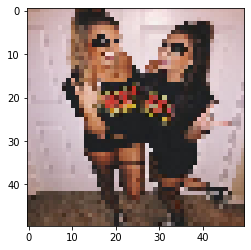

In [9]:

#########################
# read image files --> selct resolution
##########################
basic_train = []
basic_test = []
train_labels = []
test_labels = []
non_train = []
non_test = []
SHAPE = 50
filename = listdir(train_basic_path)
filename = filename[160]

image = cv2.imread(train_basic_path +filename)
image = cv2.resize(image, (SHAPE, SHAPE))  # Temporary size
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()


In [10]:
for myFile in listdir(train_basic_path):
    image = cv2.imread(train_basic_path + myFile)
    image = cv2.resize(image, (SHAPE, SHAPE))  # Temporary size
    basic_train.append(image)
    train_labels.append(1)
print("Done")
for myFile in listdir(test_basic_path):
    image = cv2.imread(test_basic_path + myFile)
    image = cv2.resize(image, (SHAPE, SHAPE))
    basic_test.append(image)
    test_labels.append(1)
print("Done")





for myFile in listdir(train_non_path):
    image = cv2.imread(train_non_path + myFile)
    image = cv2.resize(image, (SHAPE, SHAPE))
    non_train.append(image)
    train_labels.append(0)
print("Done")
for myFile in listdir(test_non_path): 
    image = cv2.imread(test_non_path + myFile)
    image = cv2.resize(image, (SHAPE, SHAPE))
    non_test.append(image)
    test_labels.append(0)
print("Done")
X_train = basic_train + non_train
y_train = train_labels
X_test = basic_test + non_test
y_test = test_labels

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

np.savez_compressed('halloween_classes.npz',
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)

Done
Done
Done
Done


In [5]:
class load_file:
    def __init__(self, file):
        self.file = file

    def get_data(self):
        hal = np.load(self.file)
        X_train, y_train, X_test, y_test = [hal[f] for f in hal.files]
        return X_train, y_train, X_test, y_test
    
df = load_file('halloween_classes.npz')
X_train, y_train, X_test, y_test = df.get_data()

In [6]:
#Now that we have our dataset in our dispose, we have to shuffle our dataset

#Lets first shuffle our training data
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

X_train= X_train[indices]
y_train = y_train[indices]


# Now our testing data
test_indices = np.arange(X_test.shape[0])

np.random.shuffle(test_indices)
X_test= X_test[test_indices]
y_test = y_test[test_indices]


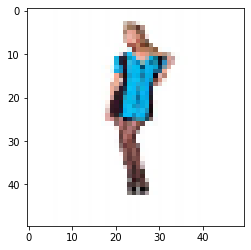

BASIC


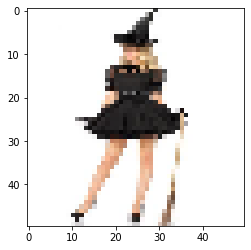

BASIC


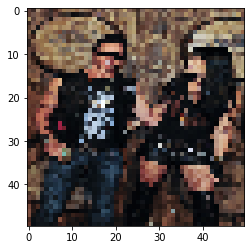

NOT BASIC


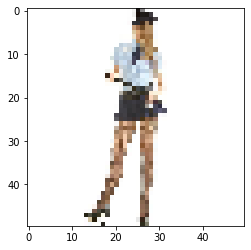

NOT BASIC


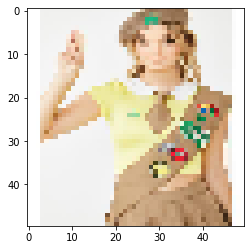

BASIC


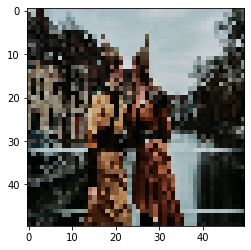

NOT BASIC


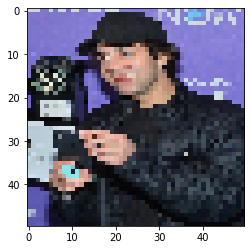

NOT BASIC


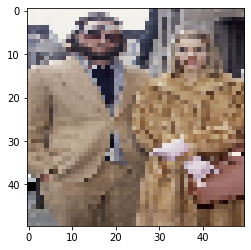

NOT BASIC


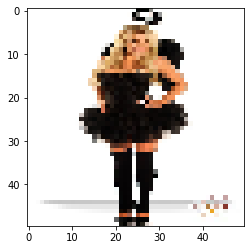

BASIC


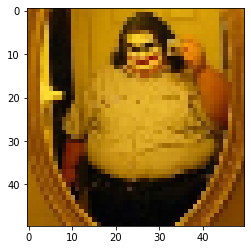

NOT BASIC


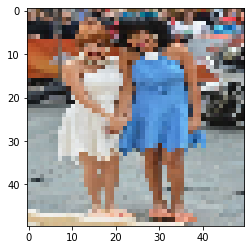

NOT BASIC


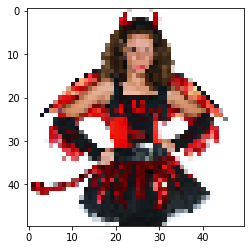

BASIC


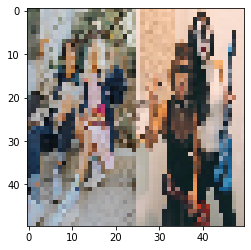

NOT BASIC


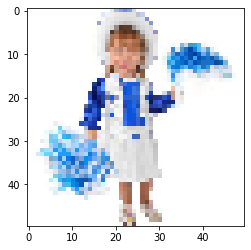

BASIC


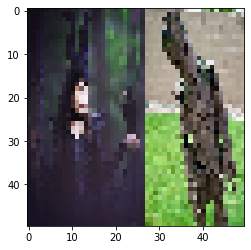

NOT BASIC


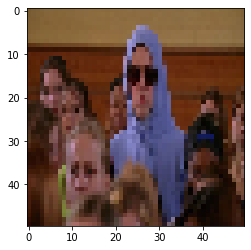

NOT BASIC


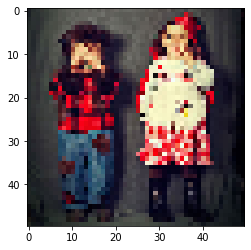

NOT BASIC


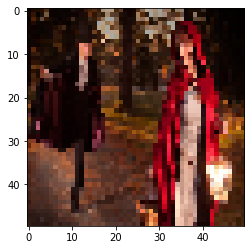

NOT BASIC


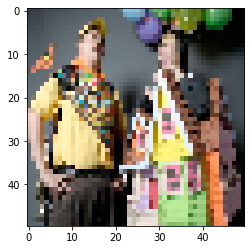

NOT BASIC


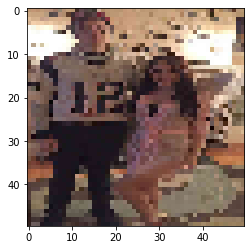

NOT BASIC


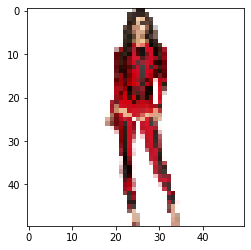

NOT BASIC


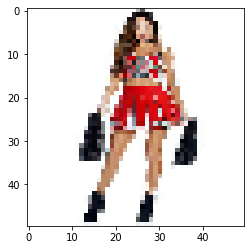

BASIC


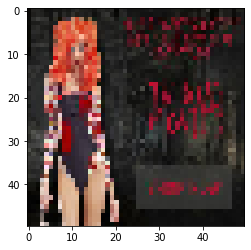

BASIC


KeyboardInterrupt: 

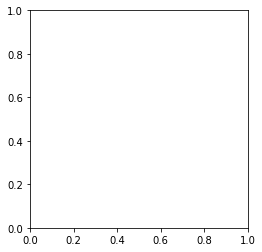

In [32]:
#cHECK TO SEE IF THE DATA AND LABELS WERE SHUFFLED CORRECLTY AND IN ORDER
for idx, i in enumerate(y_train):
    if i == 1:
        image=X_train[idx]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()
        print("BASIC")
    else:
        image=X_train[idx]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()
        print("NOT BASIC")
        


In [35]:
# Lets Start implementing our model for cnn using keras.
# We will start by importing the important libraries
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization 
from keras import backend as K
from sklearn import preprocessing
from keras.utils import to_categorical

In [48]:
input_shape = (50,50,3)
kernel_size = (1,1)
batch_size = 32
# model = Sequential()
epochs = 15
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(1, activation='sigmoid'))

cnn4.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# model.add(Conv2D(50, kernel_size=kernel_size, input_shape=input_size))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = kernel_size))

# model.add(Conv2D(25, kernel_size=kernel_size))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size= kernel_size))


# model.add(Conv2D(15, kernel_size, data_format='channels_first'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size= kernel_size))

# model.add(Flatten())
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))



In [49]:

# 5 epochs -> 73.56% acc
# 15 epochs ->
train_datagen = ImageDataGenerator( 
                        rescale=0.0/255,
                       zoom_range=.15,
                        shear_range=.15,
                        horizontal_flip=True)
   

train_generator = train_datagen.flow(x=X_train, y=y_train, batch_size=batch_size)

cnn4.fit_generator(train_generator, validation_data=(X_test,y_test), 
                   steps_per_epoch=len(X_train)//batch_size, epochs=epochs)

# # model.fit(X_train, y_train, 
# #                      batch_size=batch_size, 
# #                      epochs=epochs, 
# #                      validation_data=(X_test,y_test)) 

# train_datagen = ImageDataGenerator(rotation_range=20, 
#                        zoom_range=.15, width_shift_range=.2,
#                        height_shift_range=.2,
#                         shear_range=.15,horizontal_flip=True, 
#                         fill_mode="nearest")

# train_datagen.standarize(X_train)

# # train_generator = train_datagen.flow(trainX, trainY, batch_size=batch_size)



Epoch 1/5
121/121 [==============================] - 184s 2s/step - loss: 0.8237 - accuracy: 0.6264 - val_loss: 1.0793 - val_accuracy: 0.5712
Epoch 2/5
121/121 [==============================] - 172s 1s/step - loss: 0.7179 - accuracy: 0.6555 - val_loss: 0.6427 - val_accuracy: 0.6800
Epoch 3/5
121/121 [==============================] - 167s 1s/step - loss: 0.6508 - accuracy: 0.6919 - val_loss: 0.6990 - val_accuracy: 0.6782
Epoch 4/5
121/121 [==============================] - 168s 1s/step - loss: 0.5947 - accuracy: 0.7124 - val_loss: 0.7176 - val_accuracy: 0.6262
Epoch 5/5
121/121 [==============================] - 167s 1s/step - loss: 0.5480 - accuracy: 0.7356 - val_loss: 0.7456 - val_accuracy: 0.6136


array([1, 0, 0, ..., 0, 0, 1])